In [17]:
import glob
import os
import pickle
import numpy as np

In [18]:
folder_path = "expert/7"
pickle_files = glob.glob(os.path.join(folder_path, "*.pkl"))
loaded_dict = {}

for file in pickle_files:
    with open(file, "rb") as f:
        loaded_dict[os.path.basename(file)] = pickle.load(f)

for key in loaded_dict.keys():
    print(len(loaded_dict[key]))


actions = loaded_dict["actions.pkl"]
camera1 = loaded_dict["camera1_images.pkl"]
camera2 = loaded_dict["camera2_images.pkl"]
ee_images = loaded_dict["ee_images.pkl"]
action1 = []
action2 = []
action3 = []
action4 = []
for i in range(len(actions)):
    action1.append(actions[i][0])
    action2.append(actions[i][1])
    action3.append(actions[i][2])
    action4.append(actions[i][-1])

224
224
224
224


In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
action4 = np.array(action4)
action4[action4 < 0] = 0
action4
normalized = 1 - (action4 - min(action4)) / (max(action4) - min(action4))

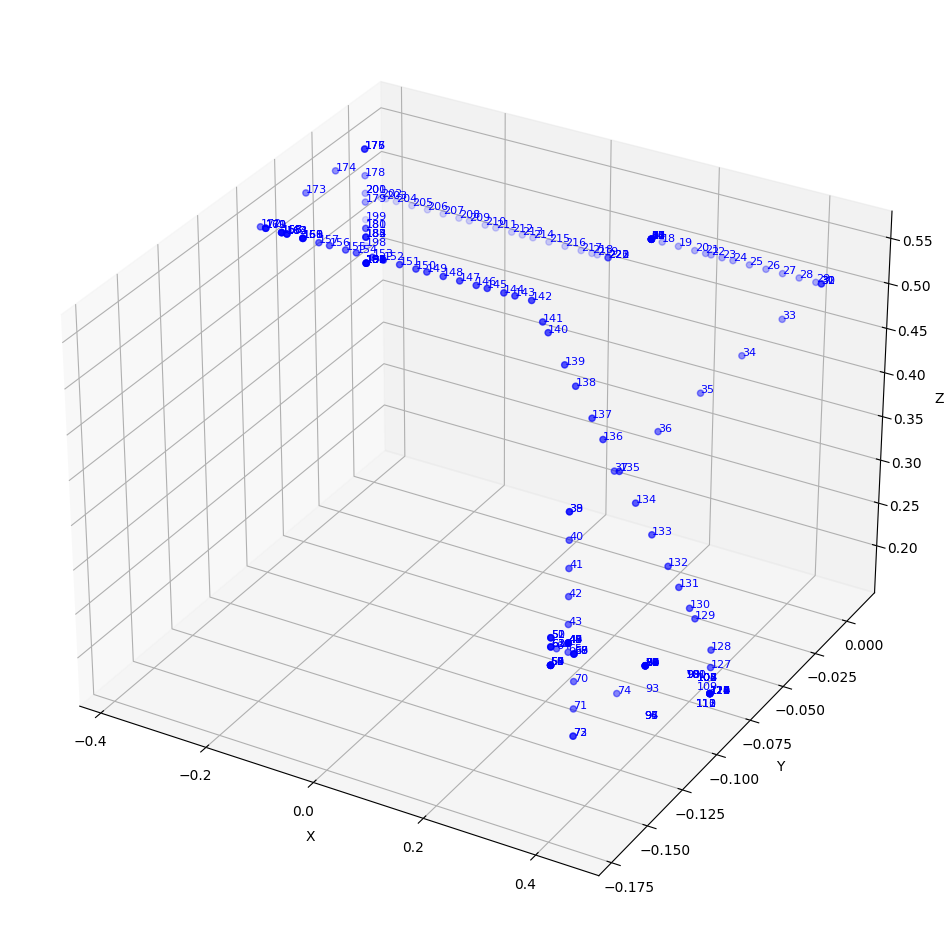

In [21]:
colors = [(0, 0, 1, alpha) for alpha in normalized]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(action1, action2, action3, color=colors)


for i in range(len(action1)):
    ax.text(action1[i], action2[i], action3[i], str(i), fontsize=8, color="blue")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [6]:
import torch

from agents.agent import BC, BCWithEncoder
from config import bc_config, iq_learn_config


def get_args(cfg):
    cfg.device = "cpu"
    return cfg


cfg1 = bc_config()
args = get_args(cfg1)

# set seeds
device = torch.device(args.device)
if device.type == "cuda" and torch.cuda.is_available() and args.cuda_deterministic:
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

# models
obs_dim = 512 * 3
action_dim = 4
action_range = [-2, 2]

agent = BCWithEncoder(obs_dim, action_dim, args)
agent.load(agent_path="results/bc_agent", encoder_path="results/bc_encoder")

c:\Users\Watan\Desktop\Code\auto_shelving\agents\agent.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.agent.load_state_dict(torch.load(agent_path))
c:\Users\Watan

In [7]:
obss = (
    np.stack(
        [
            camera1,
            camera2,
            ee_images,
        ]
    )
    / 255
).astype(np.float32)

In [8]:
pre_action1 = []
pre_action2 = []
pre_action3 = []
pre_action4 = []

In [9]:
for i in range(len(action1)):
    obs = obss[:, i, :, :, :]
    obs = obs[:, np.newaxis, :, :, :]
    obs = torch.from_numpy(obs)
    obs = agent.encoder(obs)
    caction1, caction2, caction3, caction4 = agent.agent.action(obs)
    pre_action1.append(caction1.item())
    pre_action2.append(caction2.item())
    pre_action3.append(caction3.item())
    pre_action4.append(caction4.item())

In [10]:
pre_action4 = np.array(pre_action4)
pre_action4[pre_action4 < 0] = 0
pre_action4
pre_normalized = 1 - (pre_action4 - min(pre_action4)) / (
    max(pre_action4) - min(pre_action4)
)

In [22]:
pre_loaded_dict = {}
files = ["pre_action1.pkl", "pre_action2.pkl", "pre_action3.pkl", "pre_action4.pkl"]
for file in files:
    with open(file, "rb") as f:
        pre_loaded_dict[os.path.basename(file)] = pickle.load(f)

pre_action1_1 = pre_loaded_dict["pre_action1.pkl"]
pre_action2_1 = pre_loaded_dict["pre_action2.pkl"]
pre_action3_1 = pre_loaded_dict["pre_action3.pkl"]
pre_action4_1 = pre_loaded_dict["pre_action4.pkl"]

In [23]:
pre_action4_1 = np.array(pre_action4_1)
pre_action4_1[pre_action4_1 < 0] = 0
pre_normalized_1 = 1 - (pre_action4_1 - min(pre_action4_1)) / (
    max(pre_action4_1) - min(pre_action4_1)
)

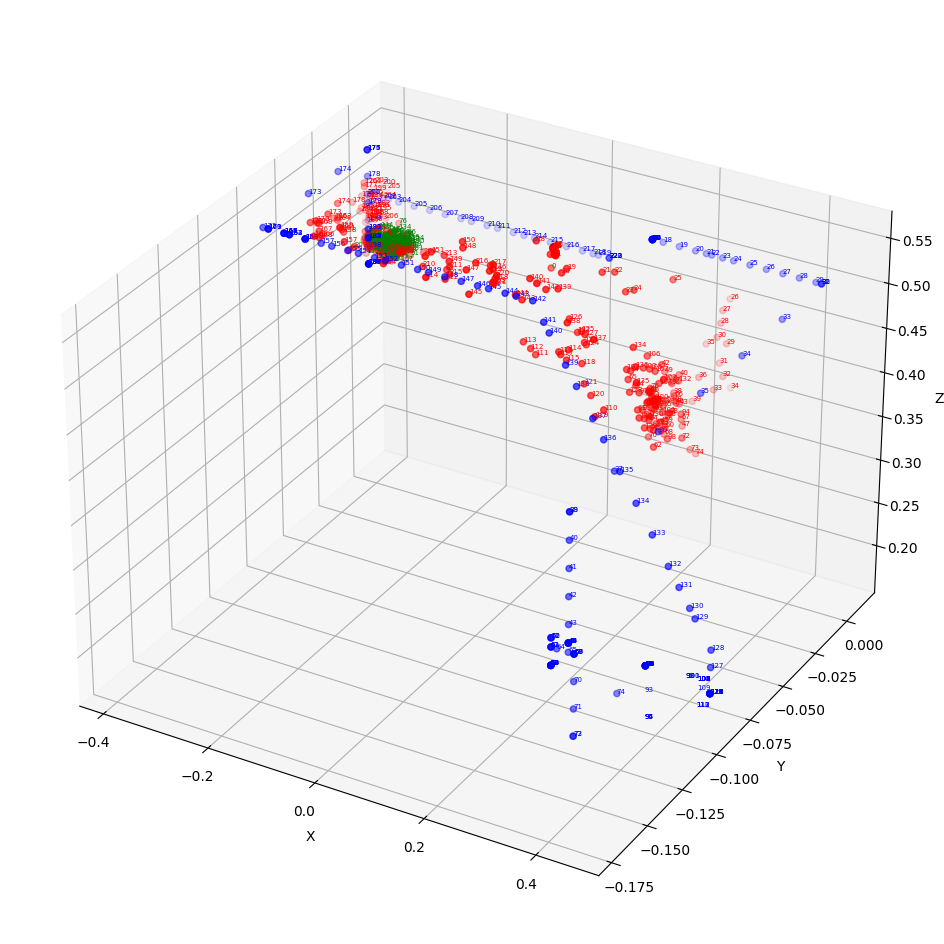

In [24]:
pre_colors = [(1, 0, 0, alpha) for alpha in pre_normalized]
pre_colors_1 = [(1, 0, 0, alpha) for alpha in pre_normalized_1]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pre_action1_1, pre_action2_1, pre_action3_1, color=pre_colors_1)
ax.scatter(pre_action1, pre_action2, pre_action3, color=pre_colors)
ax.scatter(action1, action2, action3, color=colors)

for i in range(len(pre_action1)):
    ax.text(
        pre_action1_1[i],
        pre_action2_1[i],
        pre_action3_1[i],
        str(i),
        fontsize=5,
        color="green",
    )
for i in range(len(pre_action1)):
    ax.text(
        pre_action1[i], pre_action2[i], pre_action3[i], str(i), fontsize=5, color="red"
    )
for i in range(len(action1)):
    ax.text(action1[i], action2[i], action3[i], str(i), fontsize=5, color="blue")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()